## El mapeo de Jung




In [1]:

using PyPlot
using TaylorSeries
#using IntervalArithmetic, IntervalRootFinding
#using ValidatedNumerics
#using StaticArrays

In [2]:
push!(LOAD_PATH,"/home/evelyn/Documentos/Tesis/Programas/IPM")

3-element Array{Any,1}:
 "/home/evelyn/julia0.6/julia-903644385b/local/share/julia/site/v0.6"
 "/home/evelyn/julia0.6/julia-903644385b/share/julia/site/v0.6"      
 "/home/evelyn/Documentos/Tesis/Programas/IPM"                       

In [3]:

using ParametrizacionMetodo

In [4]:
function Jung(x,y,a)
   
    x_n = x+y
    y_n = y+a*x_n*(x_n-1.)*e^(-x_n)

    return [x_n,y_n]
end

Jung (generic function with 1 method)

In [5]:
jung1(x,y)=Jung(x,y,3.4)
jung2(x,y)=Jung(x,y,5.7)


jung2 (generic function with 1 method)

In [6]:
function evaluar(Tiempo, paso,A,B,PuntoFijo,col) #función para evaluar los polinomios y graficarlos
    ValX=Float64[]
    
    ValY=Float64[]
    push!(ValX, PuntoFijo[1]) 
    push!(ValY, PuntoFijo[2])

    for t = Tiempo[1]:paso:Tiempo[2]
        #x=A(t)
        #y=B(t)
        x = evaluate(A,t)
        y = evaluate(B,t)
        
        push!(ValX,x)
        push!(ValY,y)
        
    end
    p = plot(ValX,ValY,linestyle="-",marker =",",color=col)
    title("Espacio Fase")
    legend(loc="upper right",fancybox="true")
    #grid("on")
    xlabel("x")
    ylabel("y")
    xlim(-2.,2.)
    ylim(-2.,2.)
    
end

evaluar (generic function with 1 method)

In [7]:
Orden = 45 #orden del polinomio 86
#a = parse(BigFloat,"3.4") #por si queremos hacerlo con bigfloat
#x_f = parse(BigFloat,"1.")
#y_f= parse(BigFloat,"0.")
x_fijo = [1.,0.] #punto fijo
tiempo = [0.,3.] #tiempo de evaluación del parámetro
delta_t = 0.125 #variación del parámetro
W_u, f_u, vec_u, val_u = Inestable(jung1,86 ,x_fijo,tiempo, delta_t); #inestable 
W_s, f_s, vec_s, val_s = Estable(jung1, 93 , x_fijo, tiempo, delta_t); #estable

Las vemos graficadas en el espacio fase

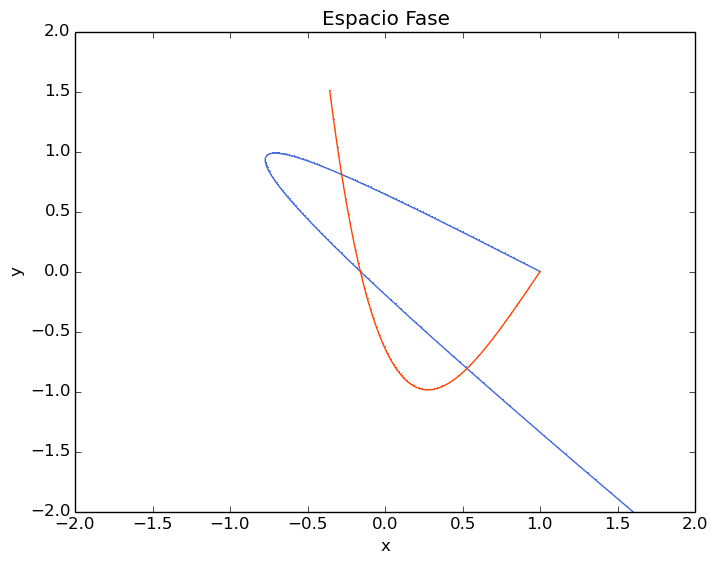

/usr/lib/pymodules/python2.7/matplotlib/axes.py:4747: UserWarning: No labeled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labeled objects found. "


(-2.0, 2.0)

In [8]:
evaluar([.1,5.5], 0.025,  W_u[1],W_u[2],[1.,0.],"royalblue")#graficamos en el espacio fase
evaluar([.1,3.2], 0.025,  W_s[1],W_s[2],[1.,0.],"orangered") 

In [9]:
#calculamos el error
tiem = [0.1,16.]
ErrorI_O20 = CalculoError(jung1, W_u,f_u,[0.1,14.4],0.025 )# recibe la función, las variedades, el intervalo de evaluación
#del parámetro y el paso
ErrorE_O20 = CalculoError(jung1, W_s,f_s,[0.,3.4],0.025 )


2-element Array{Array{Float64,1},1}:
 [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225  …  3.175, 3.2, 3.225, 3.25, 3.275, 3.3, 3.325, 3.35, 3.375, 3.4]                                                                                          
 [0.0, 6.52089e-20, 2.5981e-19, 5.80762e-19, 1.02307e-18, 1.57987e-18, 2.24247e-18, 3.00043e-18, 3.84166e-18, 4.75246e-18  …  0.139008, 0.289923, 0.601143, 1.23927, 2.54028, 5.17802, 10.4966, 21.1628, 42.4395, 84.6592]

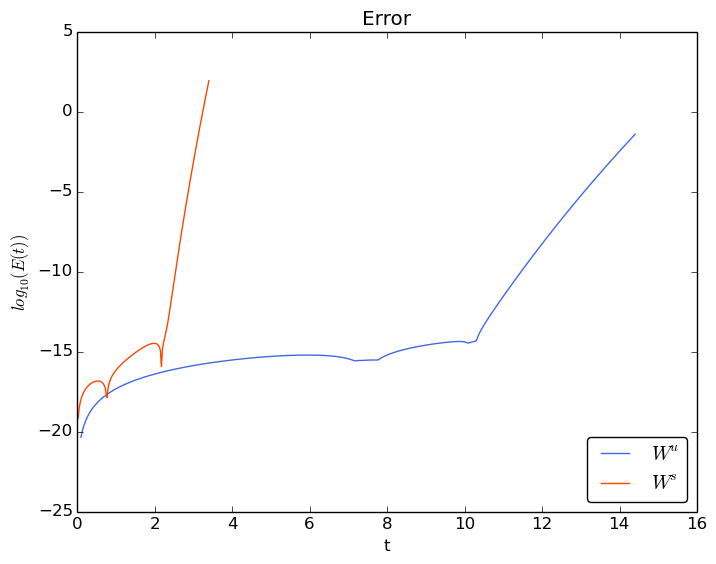

PyObject <matplotlib.legend.Legend object at 0x7f5ab4cfe150>

In [10]:
#graficamos el error
plot(ErrorI_O20[1],log10.(ErrorI_O20[2]),marker= "None", label=L"W^{u}",color="royalblue")
plot(ErrorE_O20[1],log10.(ErrorE_O20[2]),marker= "None", label=L"W^{s}",color="orangered")

xlabel("t")
ylabel(L"$log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="lower right",fancybox="true" )

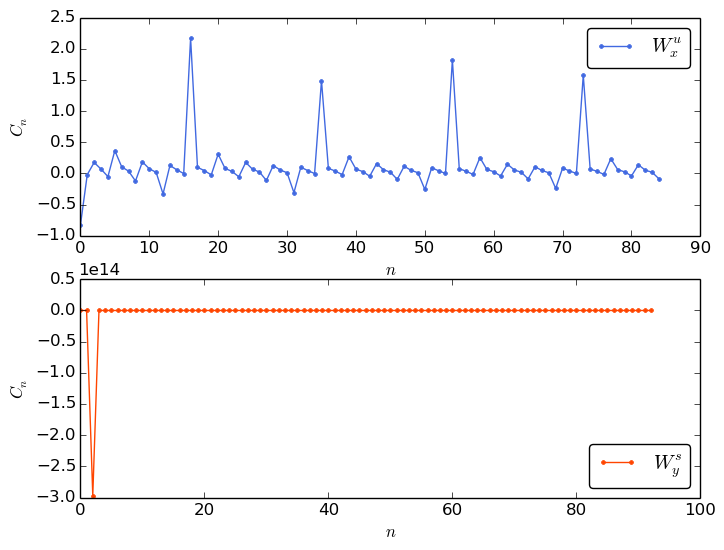

PyObject <matplotlib.legend.Legend object at 0x7f680496fd50>

In [109]:
ConverU=Convergencia(W_u[1],W_u[2])#Convergencia segun Hadamard
ConverS=Convergencia(W_s[1],W_s[2])
subplot(2,1,1)
plot(ConverU[1],marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"C_{n}")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(ConverS[1],marker=".",label=L"W^{s}_{y}",color="orangered")
xlabel(L"n")
ylabel(L"C_{n}")
legend(loc="low right",fancybox="true" )

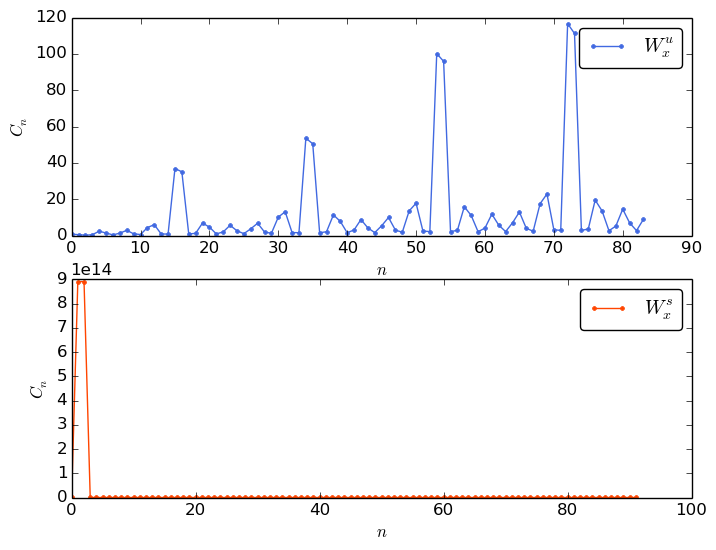

PyObject <matplotlib.legend.Legend object at 0x7f680490ef90>

In [110]:
Conver3U=Convergencia3(W_u[1],W_u[2])#Convergencia segun Hadamard
Conver3S=Convergencia3(W_s[1],W_s[2])
subplot(2,1,1)
plot(Conver3U[1],marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"C_{n}")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Conver3S[1],marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"C_{n}")
legend(loc="low right",fancybox="true" )

In [11]:
Orden = 45 #orden del polinomio 86
#a = parse(BigFloat,"3.4") #por si queremos hacerlo con bigfloat
#x_f = parse(BigFloat,"1.")
#y_f= parse(BigFloat,"0.")
x_fijo = [1.,0.] #punto fijo
tiempo = [0.,3.] #tiempo de evaluación del parámetro
delta_t = 0.125 #variación del parámetro
W_u1, f_u1, vec_u1, val_u1 = Inestable(jung2,86,x_fijo,tiempo, delta_t) #inestable 
W_s1, f_s1, vec_s1, val_s1 = Estable(jung2, 93 , x_fijo, tiempo, delta_t) #estable

(TaylorSeries.Taylor1{Float64}[ 1.0 - 0.3325166619301202 t - 2.8233900739728e-18 t² + 0.0007359419070784505 t³ + 4.0213668594735466e-5 t⁴ + 9.791964344952598e-7 t⁵ + 1.52222156400681e-9 t⁶ - 7.488751588401264e-10 t⁷ - 2.801453467455877e-11 t⁸ - 4.725268401581508e-13 t⁹ + 1.0432405259286385e-15 t¹⁰ + 2.8973766273165697e-16 t¹¹ + 8.31837873368077e-18 t¹² + 1.0903717641574318e-19 t¹³ - 5.846157289006278e-22 t¹⁴ - 6.304246994968424e-23 t¹⁵ - 1.504704448902973e-24 t¹⁶ - 1.6200454643624664e-26 t¹⁷ + 1.3261216303115632e-28 t¹⁸ + 9.318144912047685e-30 t¹⁹ + 1.9371541813057537e-31 t²⁰ + 1.769057775212826e-33 t²¹ - 1.9175581318156264e-35 t²² - 1.0363124975209766e-36 t²³ - 1.93286043967438e-38 t²⁴ - 1.5291700953733831e-40 t²⁵ + 2.050131432599226e-42 t²⁶ + 9.232208298205732e-44 t²⁷ + 1.576446686716591e-45 t²⁸ + 1.0969141062940384e-47 t²⁹ - 1.7477752099958874e-49 t³⁰ - 6.868881807274841e-51 t³¹ - 1.0896201845308697e-52 t³² - 6.745428578019294e-55 t³³ + 1.2441334680831133e-56 t³⁴ + 4.395885414132283

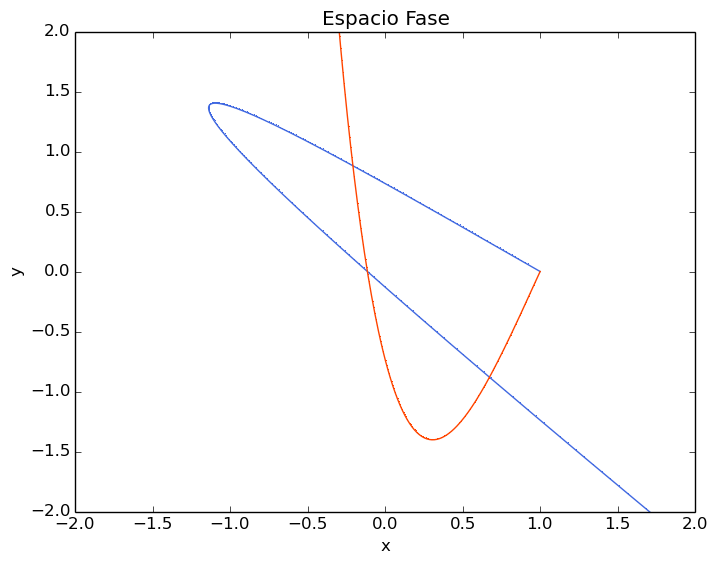

(-2.0, 2.0)

In [12]:
evaluar([.1,6.5], 0.025,  W_u1[1],W_u1[2],[1.,0.],"royalblue")#graficamos en el espacio fase
evaluar([.1,4.2], 0.025,  W_s1[1],W_s1[2],[1.,0.],"orangered") 

In [13]:
#calculamos el error
tiem = [0.1,16.]
ErrorI = CalculoError(jung2, W_u1,f_u1,[0.1,14.0],0.025 )# recibe la función, las variedades, el intervalo de evaluación
#del parámetro y el paso
ErrorE = CalculoError(jung2, W_s1,f_s1,[0.,4.0],0.025 )

2-element Array{Array{Float64,1},1}:
 [0.0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225  …  3.775, 3.8, 3.825, 3.85, 3.875, 3.9, 3.925, 3.95, 3.975, 4.0]                                                                                                                 
 [0.0, 1.11497e-17, 2.23655e-17, 3.36029e-17, 4.48162e-17, 5.59579e-17, 6.69798e-17, 7.7833e-17, 8.8468e-17, 9.88355e-17  …  0.000314089, 0.00058496, 0.00108492, 0.00200395, 0.00368656, 0.00675492, 0.0123284, 0.0224129, 0.0405901, 0.0732305]

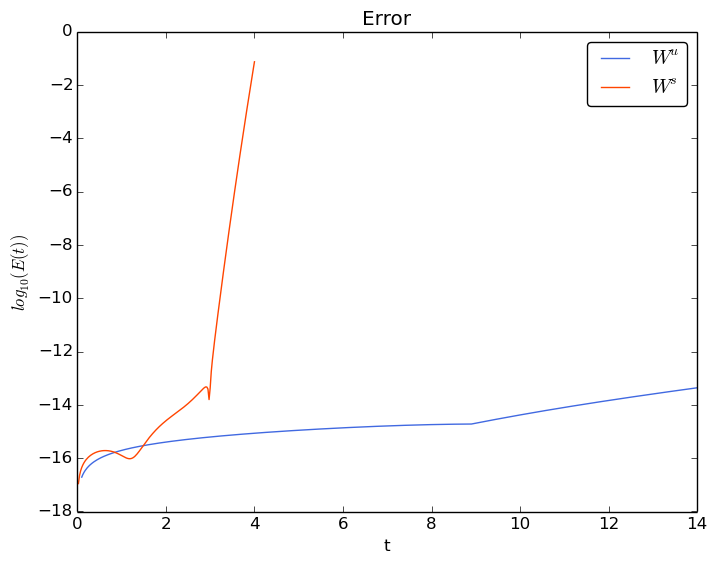

PyObject <matplotlib.legend.Legend object at 0x7f5ab4bceb90>

In [14]:
#graficamos el error
plot(ErrorI[1],log10.(ErrorI[2]),marker= "None", label=L"W^{u}",color="royalblue")
plot(ErrorE[1],log10.(ErrorE[2]),marker= "None", label=L"W^{s}",color="orangered")

xlabel("t")
ylabel(L"$log_{10}(E(t))$")
title("Error")
#grid("on")
legend(loc="upper right",fancybox="true" )

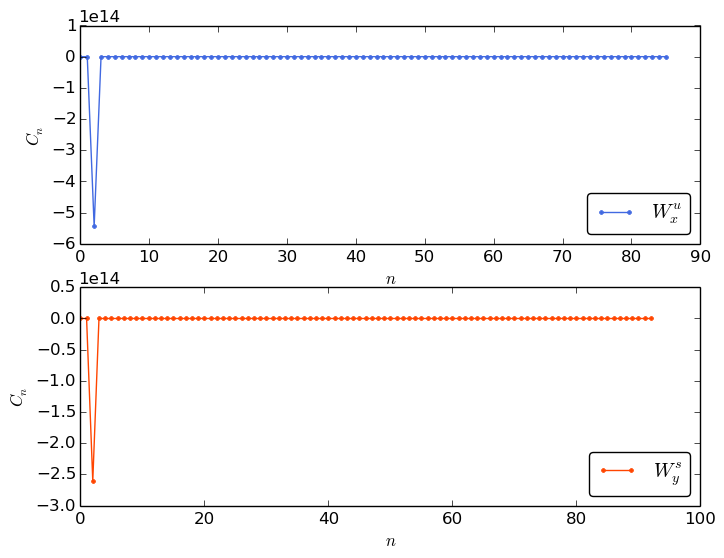

PyObject <matplotlib.legend.Legend object at 0x7f6803a5db50>

In [128]:
ConverU1=Convergencia(W_u1[1],W_u1[2])#Convergencia segun Hadamard
ConverS1=Convergencia(W_s1[1],W_s1[2])
subplot(2,1,1)
plot(ConverU1[1],marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"C_{n}")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(ConverS1[1],marker=".",label=L"W^{s}_{y}",color="orangered")
xlabel(L"n")
ylabel(L"C_{n}")
legend(loc="low right",fancybox="true" )

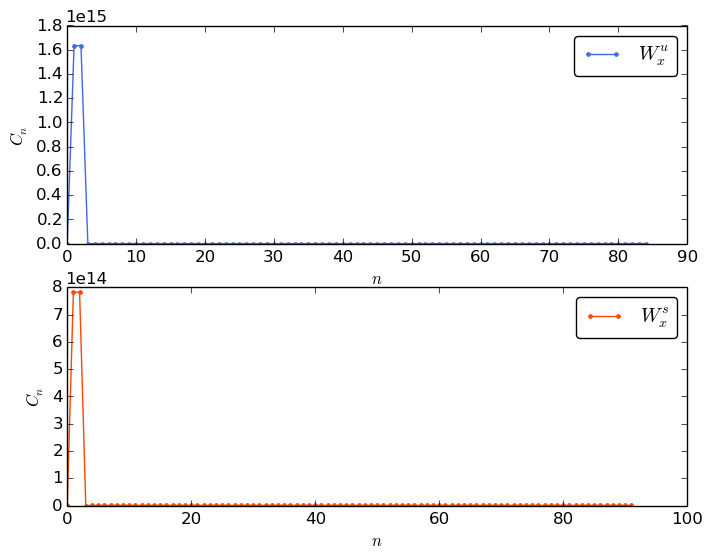

PyObject <matplotlib.legend.Legend object at 0x7f6803ff5a50>

In [129]:
Conver3U1=Convergencia3(W_u1[1],W_u1[2])#Convergencia segun Hadamard
Conver3S1=Convergencia3(W_s1[1],W_s1[2])
subplot(2,1,1)
plot(Conver3U1[1],marker=".",label=L"W^{u}_{x}",color="royalblue")
xlabel(L"n")
ylabel(L"C_{n}")
legend(loc="low right",fancybox="true" )

subplot(2,1,2)
plot(Conver3S1[1],marker=".",label=L"W^{s}_{x}",color="orangered")
xlabel(L"n")
ylabel(L"C_{n}")
legend(loc="low right",fancybox="true" )

In [52]:
#para calcular la intersección
function Interseccion(p)
    (x,y)=p
    V=SVector(( W_u[1](x)-W_s[1](y), W_u[2](x)-W_s[2](y) ))

end

Interseccion (generic function with 1 method)

In [53]:
X = (0.1..20.)×(0.1..20.) # 2D IntervalBox;

In [54]:
W_u[1](0.0),W_u[2](0.0),W_s(0.0)

(1.0, 0.0, [1.0, 0.0])

In [ ]:
r=roots(Interseccion,X, Bisection,1e-2)

In [41]:
R=roots(Interseccion,X, Newton)

LoadError: [91mInterruptException:[39m

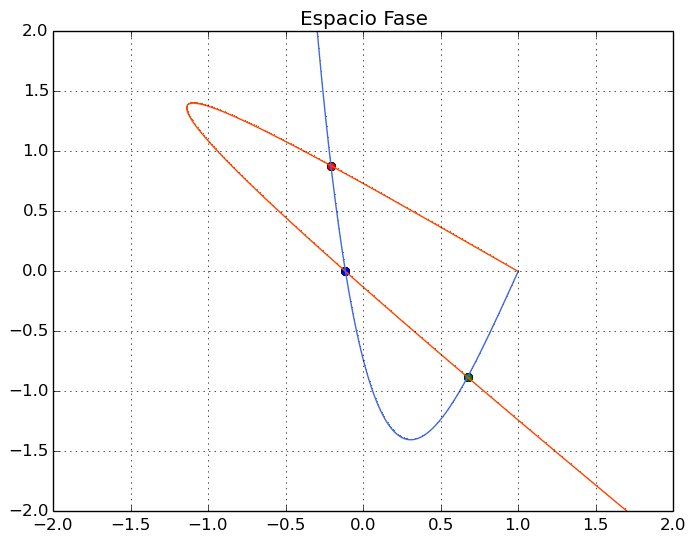

(-2, 2)

In [31]:

for ind in eachindex(R)
    plot(W_u[1].([R[ind].interval[1].lo, R[ind].interval[1].hi]), 
         W_u[2].([R[ind].interval[1].lo, R[ind].interval[1].hi]), "o")
end

evaluar([.1,6.5], 0.025,  W_u[1],W_u[2],[1.,0.],"orangered")#graficamos en el espacio fase
evaluar([.1,4.47], 0.025,  W_s[1],W_s[2],[1.,0.],"royalblue") 

In [64]:
cU=Convergencia(W_u[1],W_u[2])#Convergencia segun Hadamard
cS=Convergencia(W_s[1],W_s[2])

(Any[-0.332517, 8.49097e-18, -2.60659e14, 0.0546424, 0.0243498, 0.00155456, -0.491962, 0.0374088, 0.0168672, -0.00220779  …  0.00263424, -0.0442391, 0.0216923, 0.0104766, 0.00250915, -0.0460718, 0.0212725, 0.0103041, 0.00239978, -0.0477548], Any[4.10644e-17, -1.05385e15, 0.212416, 0.0937322, 0.00596899, -1.88772, 0.143518, 0.0647077, -0.00846965, 1.06543  …  0.0101056, -0.169712, 0.083217, 0.0401908, 0.0096257, -0.176742, 0.0816064, 0.039529, 0.00920615, -0.183199])

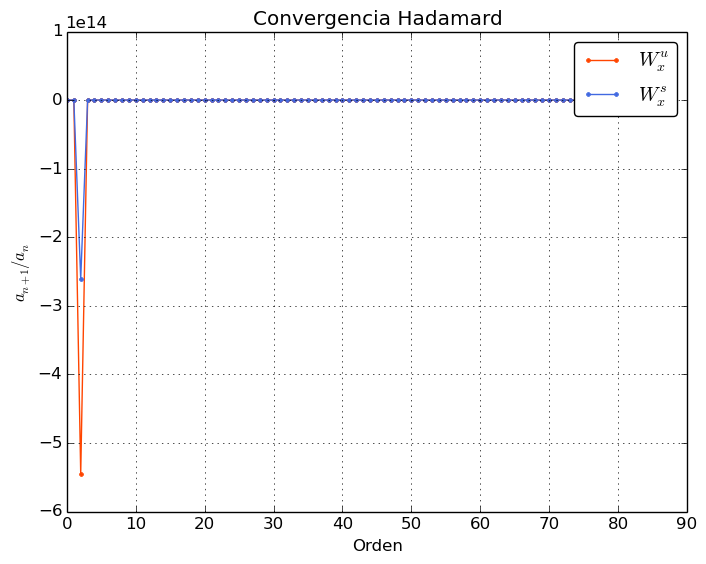

PyObject <matplotlib.legend.Legend object at 0x7fcf6421c650>

In [72]:
plot(cU[1],marker=".",label=L"W^{u}_{x}",color="orangered")
plot(cS[1],marker=".",label=L"W^{s}_{x}",color="royalblue")
xlabel("Orden")
ylabel(L"a_{n+1}/a_{n}")
title("t")
grid("on")
title("Convergencia Hadamard")
legend(loc="upper right",fancybox="true" )

In [67]:
cU3=Convergencia3(W_u[1],W_u[2])# convergencia de tres términos
cS3=Convergencia3(W_s[1],W_s[2])

(Any[0.332517, 7.81977e14, 7.81977e14, 0.0968206, 0.112422, 3.45306, 3.743, 0.147466, 0.173883, 3.07709  …  0.607963, 3.65349, 5.16434, 0.875566, 0.634888, 3.98113, 5.5435, 0.900074, 0.661562, 4.31089], Any[2.1077e15, 2.1077e15, 0.26232, 0.345084, 11.3562, 12.331, 0.486964, 0.593888, 10.7306, 9.44282  …  2.30147, 13.8358, 19.5587, 3.31586, 2.40502, 15.0862, 21.0079, 3.41082, 2.50759, 16.3452])

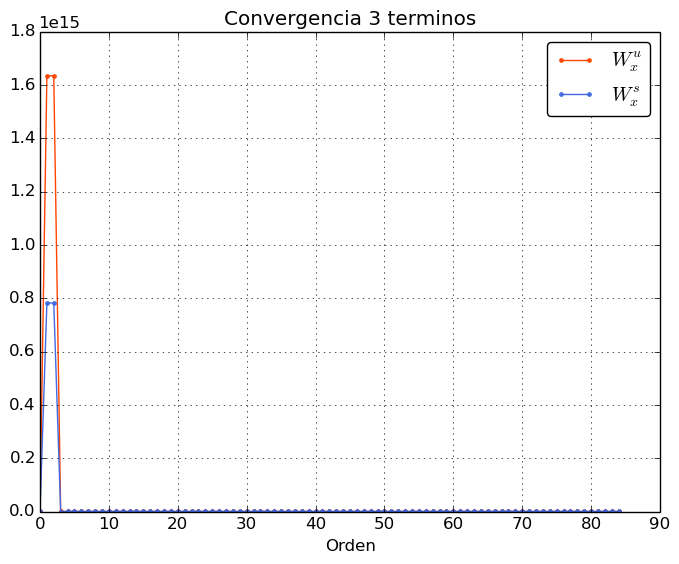

PyObject <matplotlib.legend.Legend object at 0x7fcf64280a50>

In [71]:
plot(cU3[1],marker=".",label=L"W^{u}_{x}",color="orangered")
plot(cS3[1],marker=".",label=L"W^{s}_{x}",color="royalblue")
xlabel("Orden")
#ylabel(L"a_{n+1}/a_{n}")
title("t")
grid("on")
title("Convergencia 3 terminos")
legend(loc="upper right",fancybox="true" )

## Otro parámetro

In [50]:
xfijo=[1.,0.]
Orden2 = 71
a2= 6.2
jung2(x,y)=Jung(x,y,a2)
tiempo = [-3.,4.]
delta_t = 0.125
U1,fU1,u1,v1 = Inestable(jung2,Orden2,xfijo,tiempo, delta_t)
A1,fS1,us1,vs1 =Estable(jung2,Orden2,xfijo,tiempo, delta_t)

M = [1.0 1.0; 2.28085 3.28085]
ValsOrden_aux = [0.247961, 4.03289]
EigVec_aux = [-0.799217 -0.313136; 0.601042 -0.949708]
"a" = "a"
M = [1.0 1.0; 2.28085 3.28085]
ValsOrden_aux = [0.247961, 4.03289]
EigVec_aux = [-0.799217 -0.313136; 0.601042 -0.949708]


(TaylorSeries.Taylor1{Float64}[ 1.0 - 0.3131362338145256 t + 2.2669184653344663e-18 t² + 0.0005709802826942577 t³ + 2.808811238948525e-5 t⁴ + 6.275850777086839e-7 t⁵ + 2.07949226422173e-9 t⁶ - 3.2479108641235413e-10 t⁷ - 1.1394432007206349e-11 t⁸ - 1.8142448497948764e-13 t⁹ - 9.684744869543144e-17 t¹⁰ + 7.222223693616987e-17 t¹¹ + 1.965824457707288e-18 t¹² + 2.4936632475974126e-20 t¹³ - 3.952149435541797e-23 t¹⁴ - 9.037153066440897e-24 t¹⁵ - 2.0594718585371505e-25 t¹⁶ - 2.2054574893828585e-27 t¹⁷ + 7.149755406231024e-30 t¹⁸ + 7.652764754388032e-31 t¹⁹ + 1.5307537527673126e-32 t²⁰ + 1.435497535523403e-34 t²¹ - 6.537813890359475e-37 t²² - 4.855750582276757e-38 t²³ - 8.793934720484271e-40 t²⁴ - 7.414097740361514e-42 t²⁵ + 4.1379663809611466e-44 t²⁶ + 2.4584079258184712e-45 t²⁷ + 4.119591166423182e-47 t²⁸ + 3.1871366481122623e-49 t²⁹ - 2.0255248161151883e-51 t³⁰ - 1.0357886107235254e-52 t³¹ - 1.631912531716574e-54 t³² - 1.178142372673331e-56 t³³ + 8.129186694758826e-59 t³⁴ + 3.741521546428

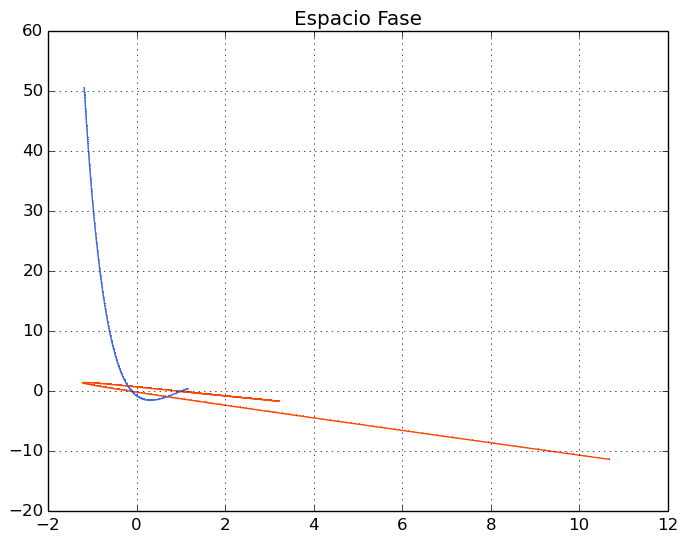

In [53]:
evaluar([-3.,9.], 0.025,  U1[1],U1[2],[1.,0.],"orangered")
evaluar([-0.5,9.], 0.025,  A1[1],A1[2],[1.,0.],"royalblue")

## Cuidado!! esto genera las gráficas del error con respecto al orden, tardan un poco...

In [ ]:
O1 = 20
O2 = 36
O3 = 45
O4 = 58
O5 = 70
O6 = 89
O7 = 100
O8 = 150
O9 = 163
#O10 = 77
x_fijo = [big(0.),big(0.)] a

tiempo = [-big(3.),big(3.)]
delta_t = big(0.125)
W1, f1, vec1, val1 = Inestable(g_estandar,O1 , x_fijo,tiempo, delta_t)
W2, f2, vec2, val2 = Inestable(g_estandar,O2 , x_fijo,tiempo, delta_t)
W3, f3, vec3, val3 = Inestable(g_estandar,O3 , x_fijo,tiempo, delta_t)
W4, f4, vec4, val4 = Inestable(g_estandar,O4 , x_fijo,tiempo, delta_t)
W5, f5, vec5, val5 = Inestable(g_estandar,O5 , x_fijo,tiempo, delta_t)
W6, f6, vec6, val6 = Inestable(g_estandar,O6 , x_fijo,tiempo, delta_t)
W7, f7, vec7, val7 = Inestable(g_estandar,O7 , x_fijo,tiempo, delta_t)
W8, f8, vec8, val8 = Inestable(g_estandar,O8 , x_fijo,tiempo, delta_t)
W9, f9, vec9, val9 = Inestable(g_estandar,O9 , x_fijo,tiempo, delta_t)
#W10, f10, vec10, val10 = Inestable(g_estandar,O10 , x_fijo,tiempo, delta_t)

In [ ]:
Tiempo = [big(0.),big(9.)]
Error1A = CalculoError(g_estandar, W1,f1,Tiempo,big(0.025) )
Error2A = CalculoError(g_estandar, W2,f2,Tiempo,big(0.025 ))
Error3A = CalculoError(g_estandar, W3,f3,Tiempo,big(0.025 ))
Error4A = CalculoError(g_estandar, W4,f4,Tiempo,big(0.025 ))
Error5A = CalculoError(g_estandar, W5,f5,Tiempo,big(0.025 ))
Error6A = CalculoError(g_estandar, W6,f6,Tiempo,big(0.025 ))
Error7A = CalculoError(g_estandar, W7,f7,Tiempo,0.025 )
#Error8A = CalculoError(g_estandar, W8,f8,Tiempo,big(0.025 ))
#Error9A = CalculoError(g_estandar, W9,f9,Tiempo,big(0.025 ))
#Error10A = CalculoError(f_estandar1, W10,f10,Tiempo,0.025 )



In [ ]:
plot(Error1A[1],log10(Error1A[2]),marker= "None", label="$O1")
plot(Error2A[1],log10(Error2A[2]),marker= "None", label="$O2")
plot(Error3A[1],log10(Error3A[2]),marker= "None", label="$O3")
plot(Error4A[1],log10(Error4A[2]),marker= "None", label="$O4")
plot(Error5A[1],log10(Error5A[2]),marker= "None", label="$O5")
plot(Error6A[1],log10(Error6A[2]),marker= "None", label="$O6")
#plot(Error7A[1],log10(Error7A[2]),marker= "None", label="$O7")
#plot(Error8A[1],log10(Error8A[2]),marker= "None", label="$O8")
#plot(Error9A[1],log10(Error9A[2]),marker= "None", label="$O9")
#plot(Error10A[1],log10(Error10A[2]),marker= "None", label="$O10")


xlabel("t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
#ylim(-16.,-15.2)
legend(loc="low right",fancybox="true")

In [ ]:
O1 = 20
O2 = 10
O3 = 30
O4 = 40
O5 = 25
O6 = 28
x_fijo = [0.,0.] 
tiempo = [-3.,3.]
delta_t = 0.125
V1, h1, vec1, val1 = Estable(f_estandar1,O1 , x_fijo,tiempo, delta_t)
V2, h2, vec2, val2 = Estable(f_estandar1,O2 , x_fijo,tiempo, delta_t)
V3, h3, vec3, val3 = Estable(f_estandar1,O3 , x_fijo,tiempo, delta_t)
V4, h4, vec4, val4 = Estable(f_estandar1,O4 , x_fijo,tiempo, delta_t)
V5, h5, vec5, val5 = Estable(f_estandar1,O5 , x_fijo,tiempo, delta_t)
V6, h6, vec6, val6 = Estable(f_estandar1,O6 , x_fijo,tiempo, delta_t)

In [ ]:
Tiempo = [0.,5.]
Error1A = CalculoError(f_estandar1, V1,h1,Tiempo,0.025 )
Error2A = CalculoError(f_estandar1, V2,h2,Tiempo,0.025 )
Error3A = CalculoError(f_estandar1, V3,h3,Tiempo,0.025 )
Error4A = CalculoError(f_estandar1, V4,h4,Tiempo,0.025 )
Error5A = CalculoError(f_estandar1, V5,h5,Tiempo,0.025 )
Error6A = CalculoError(f_estandar1, V6,h6,Tiempo,0.025 )



In [ ]:
plot(Error1A[1],log10(Error1A[2]),marker= "None", label="$O1")
plot(Error2A[1],log10(Error2A[2]),marker= "None", label="$O2")
plot(Error3A[1],log10(Error3A[2]),marker= "None", label="$O3")
plot(Error4A[1],log10(Error4A[2]),marker= "None", label="$O4")
plot(Error5A[1],log10(Error5A[2]),marker= "None", label="$O5")
plot(Error6A[1],log10(Error6A[2]),marker= "None", label="$O6")


xlabel("Parámetro t")
ylabel(L"log10($|| E||_{\infty})$")
title("Error")
#grid("on")
#ylim(-16.,-15.2)
legend(loc="low right",fancybox="true" )